In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
adx_data = pd.read_csv('/content/Q4_ADX_Sample_data.csv')

In [4]:
# Check for missing values and handle them appropriately
adx_data.isna().sum()

date                0
pub_id              0
app_id              0
ad_unit_code        0
country           420
requests            0
ae_responses        0
ae_impressions      0
ae_clicks           0
ae_revenue          0
dtype: int64

In [5]:
# Perform basic descriptive statistics on each metric
adx_data.columns

Index(['date', 'pub_id', 'app_id', 'ad_unit_code', 'country', 'requests',
       'ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue'],
      dtype='object')

In [12]:
adx_data.dtypes

date               object
pub_id              int64
app_id              int64
ad_unit_code        int64
country            object
requests            int64
ae_responses        int64
ae_impressions      int64
ae_clicks           int64
ae_revenue        float64
dtype: object

In [6]:
# Calculate the correlation matrix of the metrics
corr_matrix = adx_data[['requests','ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue']].corr()
print(corr_matrix)

                requests  ae_responses  ae_impressions  ae_clicks  ae_revenue
requests        1.000000      0.972617        0.928692   0.425497    0.569049
ae_responses    0.972617      1.000000        0.941226   0.437700    0.640976
ae_impressions  0.928692      0.941226        1.000000   0.483948    0.547998
ae_clicks       0.425497      0.437700        0.483948   1.000000    0.275070
ae_revenue      0.569049      0.640976        0.547998   0.275070    1.000000


In [7]:
# Step 1: Group the data by app_id
grouped_data = adx_data.groupby('app_id')


In [ ]:
adx_data.columns

Index(['date', 'pub_id', 'app_id', 'ad_unit_code', 'country', 'requests',
       'ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue',
       'show_rate', 'click_rate'],
      dtype='object')

In [8]:
# Step 2: Compute summary statistics for each metric for each app
summary_stats = grouped_data.agg({'requests': ['mean', 'median', 'std', 'min', 'max'],
                                  'ae_impressions': ['mean', 'median', 'std', 'min', 'max'],
                                  'ae_clicks': ['mean', 'median', 'std', 'min', 'max'],
                                  'ae_revenue': ['mean', 'median', 'std', 'min', 'max'],
                                  'ae_responses':['mean', 'median', 'std', 'min', 'max']})

# Step 3: Compute show-rate and click-rate for each app
summary_stats['show_rate'] = summary_stats['ae_impressions']['mean'] / summary_stats['ae_responses']['mean']
summary_stats['click_rate'] = summary_stats['ae_clicks']['mean'] / summary_stats['ae_impressions']['mean']

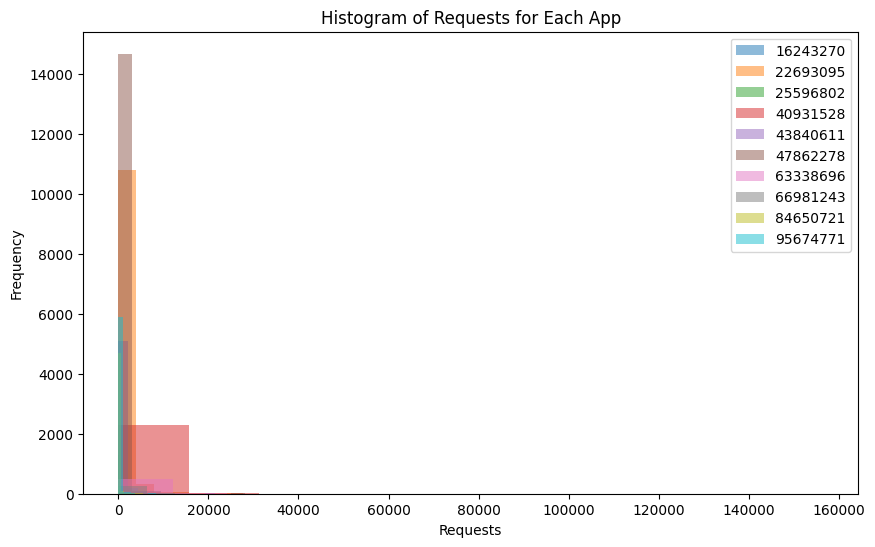

In [9]:
# Histogram of requests for each app
plt.figure(figsize=(10, 6))
for app_id, group in grouped_data:
    plt.hist(group['requests'], alpha=0.5, label=str(app_id))
plt.legend()
plt.title('Histogram of Requests for Each App')
plt.xlabel('Requests')
plt.ylabel('Frequency')
plt.show()

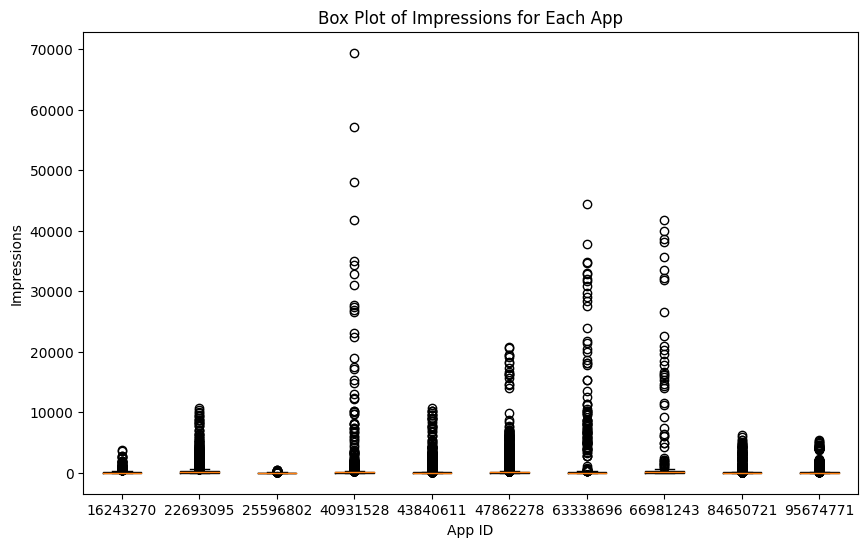

In [10]:
# Box plot of impressions for each app
plt.figure(figsize=(10, 6))
data = [group['ae_impressions'].tolist() for app_id, group in grouped_data]
plt.boxplot(data, labels=grouped_data.groups.keys())
plt.title('Box Plot of Impressions for Each App')
plt.xlabel('App ID')
plt.ylabel('Impressions')
plt.show()

In [11]:
# Step 4: Compute mean request frequency and mean impressions for each app
app_stats = grouped_data.agg({'requests': ['mean'], 'ae_impressions': ['mean']})

# Step 5: Identify apps with higher than average request frequency
mean_requests = app_stats['requests']['mean'].mean()
high_request_apps = app_stats[app_stats['requests']['mean'] > mean_requests]
print("Apps with higher than average request frequency:")
print(high_request_apps)

# Step 6: Identify apps with lower than average impressions
mean_impressions = app_stats['ae_impressions']['mean'].mean()
low_impression_apps = app_stats[app_stats['ae_impressions']['mean'] < mean_impressions]
print("Apps with lower than average impressions:")
print(low_impression_apps)


Apps with higher than average request frequency:
             requests ae_impressions
                 mean           mean
app_id                              
63338696  5108.245961    2019.030521
66981243  3456.297578    2342.543253
Apps with lower than average impressions:
             requests ae_impressions
                 mean           mean
app_id                              
16243270   276.543186     218.702495
22693095   916.646798     312.147905
25596802    54.170717      44.754517
40931528  1127.442814     473.421234
43840611   553.852628     212.732819
47862278   399.051442     210.771690
84650721   173.941093     132.532002
95674771   199.981017     124.540938


Based on the analysis, we have identified some potential anomalies in the data. Two apps, with app_ids 63338696 and 66981243, have higher than average request frequency.

Additionally, there are eight apps with lower than average impressions, which are apps with app_ids 16243270, 22693095, 25596802, 40931528, 43840611, 47862278, 84650721, and 95674771. These observations may indicate some issues with the data or with the performance of these apps.

Furthermore, we also observed that the country column has 420 null values, which may impact the analysis and insights derived from this data. We recommend investigating this further to ensure the data quality and accuracy.

It's important to note that these results are based on the current dataset and analysis, and further investigation is needed to confirm if these observations are indeed anomalies and to identify any underlying causes.

In [ ]:
# Step 7: Detect and remove outliers
from scipy.stats import zscore

# Compute z-scores for each metric for each app
z_scores = grouped_data.apply(lambda x: (x - x.mean()) / x.std())

# Identify and remove outliers based on z-score threshold (e.g. 3)
threshold = 3
outlier_mask = z_scores.abs() > threshold
cleaned_data = adx_data[~outlier_mask]